In [3]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.0 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
from tslearn.datasets import UCR_UEA_datasets

In [6]:
# Load the NATOPS dataset
ucr = UCR_UEA_datasets()
X_train, y_train, _, _ = ucr.load_dataset("NATOPS")

SAMPLE VISUALISATION

In [7]:
# Select a sample to visualize (e.g., first instance)
sample_series = X_train[0]  # Shape: (51 time steps, 24 dimensions)

In [13]:
sample_series

array([[-0.372758, -1.821679, -0.846321, ...,  0.619205, -1.771773,
        -0.810086],
       [-0.367844, -1.841987, -0.846325, ...,  0.617045, -1.79666 ,
        -0.818863],
       [-0.378445, -1.821358, -0.839571, ...,  0.624789, -1.738568,
        -0.78806 ],
       ...,
       [-0.537007, -1.751323, -0.60374 , ...,  0.541325, -1.691657,
        -0.716364],
       [-0.475939, -1.772353, -0.763048, ...,  0.559272, -1.683121,
        -0.757526],
       [-0.479505, -1.761632, -0.793202, ...,  0.571569, -1.721661,
        -0.741532]])

In [10]:
sample_series.shape

(51, 24)

In [33]:
y_train

array(['4.0', '3.0', '3.0', '4.0', '3.0', '5.0', '1.0', '6.0', '3.0',
       '2.0', '6.0', '1.0', '4.0', '6.0', '3.0', '2.0', '3.0', '2.0',
       '2.0', '6.0', '4.0', '3.0', '5.0', '4.0', '1.0', '6.0', '3.0',
       '5.0', '5.0', '5.0', '3.0', '5.0', '3.0', '5.0', '4.0', '5.0',
       '3.0', '1.0', '4.0', '6.0', '3.0', '4.0', '4.0', '6.0', '1.0',
       '6.0', '2.0', '1.0', '1.0', '6.0', '4.0', '1.0', '3.0', '3.0',
       '2.0', '1.0', '5.0', '1.0', '2.0', '5.0', '4.0', '5.0', '2.0',
       '5.0', '1.0', '6.0', '3.0', '1.0', '2.0', '1.0', '3.0', '4.0',
       '4.0', '3.0', '5.0', '2.0', '2.0', '3.0', '3.0', '6.0', '6.0',
       '1.0', '2.0', '5.0', '2.0', '2.0', '4.0', '5.0', '6.0', '4.0',
       '2.0', '3.0', '1.0', '3.0', '1.0', '5.0', '6.0', '6.0', '5.0',
       '5.0', '6.0', '4.0', '2.0', '1.0', '2.0', '2.0', '2.0', '6.0',
       '5.0', '4.0', '3.0', '4.0', '1.0', '3.0', '5.0', '5.0', '5.0',
       '4.0', '3.0', '6.0', '3.0', '1.0', '3.0', '4.0', '1.0', '6.0',
       '2.0', '1.0',

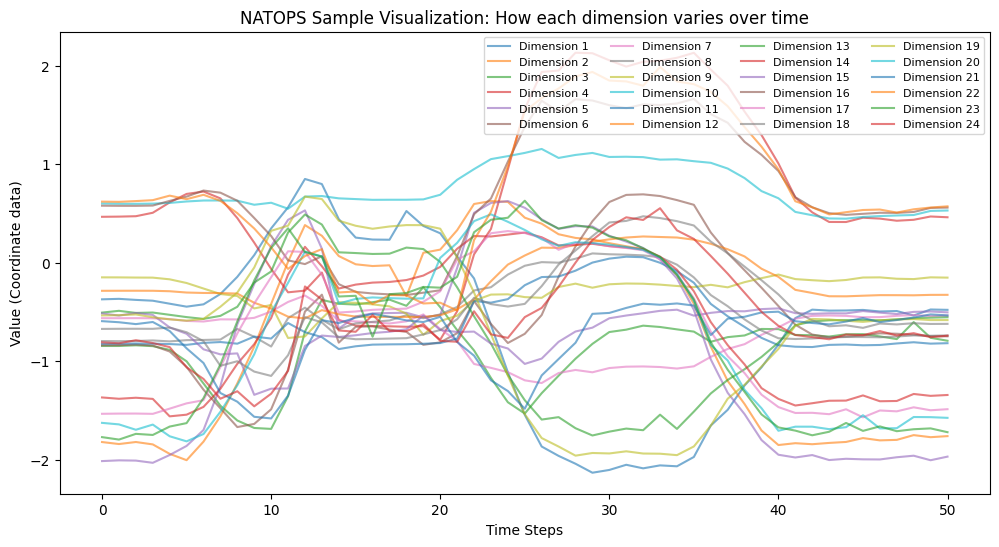

In [27]:
# Plot multiple dimensions of the selected sample
plt.figure(figsize=(12, 6))
for i in range(sample_series.shape[1]):  # Iterate over 24 dimensions
    plt.plot(sample_series[:, i], label=f"Dimension {i+1}", alpha=0.6)
plt.xlabel('Time Steps')
plt.ylabel('Value (Coordinate data)')
plt.title('NATOPS Sample Visualization: How each dimension varies over time')
plt.legend(ncol=4, fontsize=8, loc='upper right')

CLASS-WISE MEAN SIGNAL

In [19]:
import numpy as np

In [20]:
# Get unique class labels
unique_classes = np.unique(y_train)

In [21]:
unique_classes

array(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'], dtype='<U3')

In [34]:
cls_names = {
    1.0: "I have command",
    2.0: "All clear",
    3.0: "Not clear",
    4.0: "Spread wings",
    5.0: "Fold wings",
    6.0: "Lock wings"
}

In [22]:
# Compute mean time series for each class
mean_signals = {cls: np.mean(X_train[y_train == cls], axis=0) for cls in unique_classes}

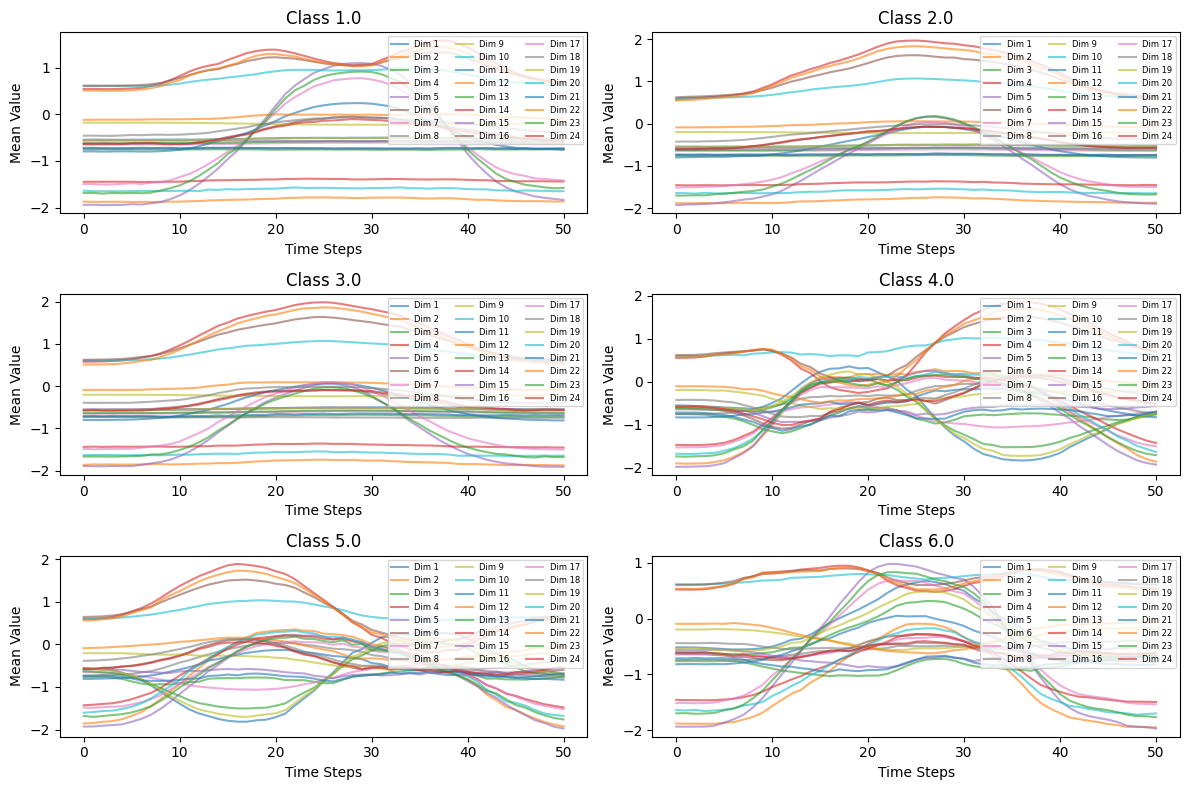

In [39]:
# Set up 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
# Plot each class in a separate subplot
for idx, (cls, mean_signal) in enumerate(mean_signals.items()):
    ax = axes[idx]
    for dim in range(mean_signal.shape[1]):  # Iterate over 24 dimensions
        ax.plot(mean_signal[:, dim], label=f"Dim {dim+1}", alpha=0.6)

    ax.set_title(f"Class {cls}")
    ax.set_xlabel("Time Steps")
    ax.set_ylabel("Mean Value")
    ax.legend(fontsize=6, loc='upper right', ncol=3)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
